In [1]:
from wanpy.wpythtb import *
from pythtb import *
from models import Haldane

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
# Haldane tight-binding parameters
delta = 1
t = 1
t2 = -0.3 

n_super_cell = 1
model = Haldane(delta, t, t2).make_supercell([[n_super_cell, 0], [0, n_super_cell]])
model_name = "haldane"
param_name = f"Delta={delta}_t={t}_t2={t2}"

lat_vecs = model.get_lat()
orb_vecs = model.get_orb()
n_orb = n_orb = model.get_num_orbitals()
n_occ = int(n_orb/2)

low_E_sites = np.arange(0, n_orb, 2)
high_E_sites = np.arange(1, n_orb, 2)

u_wfs_full = wf_array(model, [20, 20])
u_wfs_full.solve_on_grid([0, 0])
chern = u_wfs_full.berry_flux([i for i in range(n_occ)])/(2*np.pi)

model_str = f'C={chern:.1f}_{param_name}'

print(f"Low energy sites: {low_E_sites}")
print(f"High energy sites: {high_E_sites}")
print(f"Chern # occupied: {chern: .1f}")
print(model_str)

Low energy sites: [0]
High energy sites: [1]
Chern # occupied:  1.0
C=1.0_Delta=1_t=1_t2=-0.3


# Single plot

In [3]:
random = False
low_E = True
omit = False

if random:
    omit_num = 0
    n_tfs = n_occ - omit_num
    tf_list = ["random", n_tfs]
elif omit:
    omit_sites = 2
    tf_list = list(np.setdiff1d(low_E_sites, [omit_sites])) # delta on lower energy sites omitting the last site
    # np.random.choice(low_E_sites, n_tfs, replace=False)
    n_tfs = len(tf_list)
elif low_E:
    tf_list = list(low_E_sites)
    n_tfs = len(tf_list)

Wan_frac = n_tfs/n_occ

if random:
    save_name = model_str + f'_tfxs={tf_list}'
else:
    save_name = model_str + f'_tfx={np.array(tf_list, dtype=int)}'

sv_prefix = f'{model_name}_sing_vals'
sv_dir = 'data'
file_name = f"{sv_dir}/{sv_prefix}_{save_name}"

print(f"# of Wannier functions: {n_tfs}")
print(f"# of occupied bands: {n_occ}")
print(f"Wannier fraction: {Wan_frac}")
print(file_name)

# of Wannier functions: 1
# of occupied bands: 1
Wannier fraction: 1.0
data/haldane_sing_vals_C=1.0_Delta=1_t=1_t2=-0.3_tfx=[0]


In [4]:
S_path = np.load(f"{file_name}.npy", allow_pickle=True)

In [5]:
k_path = [[0, 0], [2/3, 1/3], [.5, .5], [1/3, 2/3], [0, 0], [.5, .5]]
label = (r'$\Gamma $',r'$K$', r'$M$', r'$K^\prime$', r'$\Gamma $', r'$M$')
nk = 201
(k_vec, k_dist, k_node) = model.k_path(k_path, nk, report=False)

Text(0.5, 1.0, 'Haldane model \n$C =  1.0$, $\\Delta = 1$, $t=  1.00, t_2 = -0.30$')

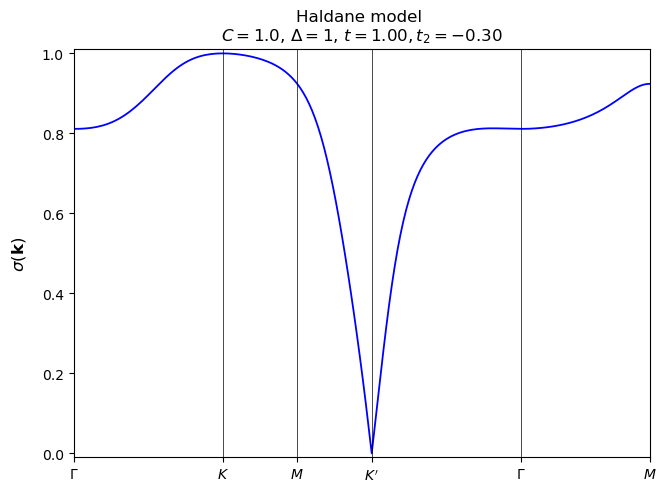

In [6]:
fig, ax = plt.subplots(1,1, gridspec_kw={'hspace':0.1}, sharex=True)

for n in range(S_path.shape[-1]):
  ax.plot(k_dist, S_path[:, n], c='b', lw=1.3)

# add vertical lines at node positions
for n in range(len(k_node)):
  ax.axvline(x=k_node[n], linewidth=0.5, color='k')

ax.set_xlim(k_node[0], k_node[-1])
ax.set_ylim(-0.01, 1.01)
ax.set_xticks(k_node)
ax.set_xticklabels(label)
# ax.xaxis.set_ticks_position('none') 
ax.set_ylabel(r"$\sigma(\mathbf{k})$", size=12)
ax.yaxis.labelpad = 10

plt.subplots_adjust(top=0.95, left=0.1, bottom=0.1, right=1)

ax.set_title(
  f"Haldane model \n"
  fr"$C = {chern: .1f}$, $\Delta = {delta}$, $t= {t: .2f}, t_2 = {t2: .2f}$"
  )

# save_name = f'C={chern:.1f}_Delta={delta}_t={t}_t2={t2}_n_occ={n_occ}_comparison'
# plt.savefig(f'images/Haldane_2x2SC_{save_name}.png', dpi=700)

# Comparison

In [7]:
delta = 1
t = 1
t2 = -0.3 

n_super_cell = 2
model = Haldane(delta, t, t2).make_supercell([[n_super_cell, 0], [0, n_super_cell]])
lat_vecs = model.get_lat()
orb_vecs = model.get_orb()
n_orb = n_orb = model.get_num_orbitals()
n_occ = int(n_orb/2)
low_E_sites = np.arange(0, n_orb, 2)
high_E_sites = np.arange(1, n_orb, 2)

model_name = "haldane"
sv_prefix = f'{model_name}_sing_vals'
sv_dir = 'data'
save_name = f'C={chern:.1f}_{param_name}'

In [8]:
tf_list = list(low_E_sites)
n_tfs = len(tf_list)
Wan_frac = n_tfs/n_occ
print(f"# of Wannier functions: {n_tfs}")
print(f"# of occupied bands: {n_occ}")
print(f"Wannier fraction: {Wan_frac}")

file_name = f"{sv_dir}/{sv_prefix}_{save_name}_tfx={np.array(tf_list, dtype=int)}.npy"
print(file_name)
S_sing = np.load(file_name, allow_pickle=True)

# of Wannier functions: 4
# of occupied bands: 4
Wannier fraction: 1.0
data/haldane_sing_vals_C=1.0_Delta=1_t=1_t2=-0.3_tfx=[0 2 4 6].npy


In [9]:
omit_sites = 6
tf_list = list(np.setdiff1d(low_E_sites, [omit_sites])) # delta on lower energy sites omitting the last site
n_tfs = len(tf_list)
Wan_frac = n_tfs/n_occ

print(f"# of Wannier functions: {n_tfs}")
print(f"# of occupied bands: {n_occ}")
print(f"Wannier fraction: {Wan_frac}")

file_name = f"{sv_dir}/{sv_prefix}_{save_name}_tfx={np.array(tf_list, dtype=int)}.npy"
print(file_name)
S_dfcnt = np.load(file_name, allow_pickle=True)

# of Wannier functions: 3
# of occupied bands: 4
Wannier fraction: 0.75
data/haldane_sing_vals_C=1.0_Delta=1_t=1_t2=-0.3_tfx=[0 2 4].npy


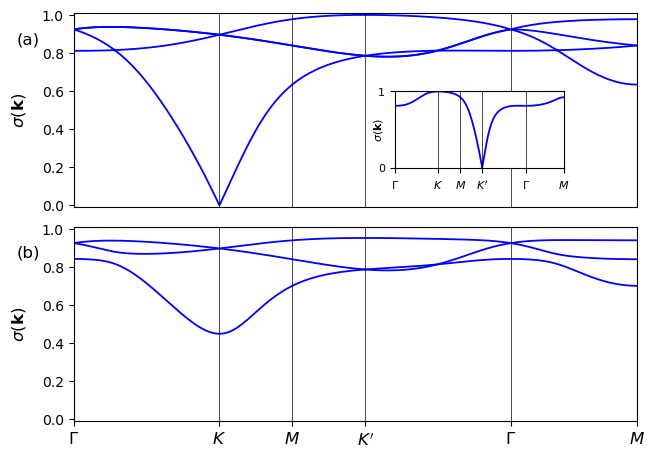

In [10]:
# figure for bandstructure
fig, ax = plt.subplots(2, 1, gridspec_kw={'hspace':0.1}, sharex=True)

k_path = [[0, 0], [2/3, 1/3], [.5, .5], [1/3, 2/3], [0, 0], [.5, .5]]
label = (r'$\Gamma $',r'$K$', r'$M$', r'$K^\prime$', r'$\Gamma $', r'$M$')
nk = 201
(k_vec, k_dist, k_node) = model.k_path(k_path, nk, report=False)

for n in range(S_sing.shape[-1]):
  ax[0].plot(k_dist, S_sing[:, n], c='b', lw=1.3)

# add vertical lines at node positions
for n in range(len(k_node)):
  ax[0].axvline(x=k_node[n], linewidth=0.5, color='k')

ax[0].set_xlim(k_node[0], k_node[-1])
ax[0].set_ylim(-0.01, 1.01)
# ax[0].set_xticks(k_node)
# ax[0].set_xticklabels(label)
ax[0].xaxis.set_ticks_position('none') 
ax[0].set_ylabel(r"$\sigma(\mathbf{k})$", size=12)
ax[0].yaxis.labelpad = 10
ax[0].text(-.13, 0.85, '(a)', size=12)

for n in range(S_dfcnt.shape[-1]):
  ax[1].plot(k_dist, S_dfcnt[:, n], c='b', lw=1.3)

# add vertical lines at node positions
for n in range(len(k_node)):
  ax[1].axvline(x=k_node[n], linewidth=0.5, color='k')

ax[1].set_xlim(k_node[0], k_node[-1])
ax[1].set_ylim(-0.01, 1.01)
ax[1].set_xticks(k_node)
ax[1].set_xticklabels(label, size=12)
ax[1].set_ylabel(r"$\sigma(\mathbf{k})$", size=12)
ax[1].yaxis.labelpad = 10
ax[1].text(-.13, 0.85, '(b)', size=12)


inset_ax = ax[0].inset_axes([0.57, 0.2, 0.3, 0.4])  # [x0, y0, widthx, widthy]
for n in range(S_path.shape[-1]):
  inset_ax.plot(k_dist, S_path[:, n], c='b', lw=1.3)

# add vertical lines at node positions
for n in range(len(k_node)):
  inset_ax.axvline(x=k_node[n], linewidth=0.5, color='k')

inset_ax.set_xlim(k_node[0], k_node[-1])
inset_ax.set_ylim(-0.01, 1.01)
inset_ax.set_xticks(k_node)
inset_ax.tick_params(axis='y', labelsize=8)
inset_ax.set_yticks([0,1])
inset_ax.set_xticklabels(label, size=8)
# ax.xaxis.set_ticks_position('none') 
inset_ax.set_ylabel(r"$\sigma(\mathbf{k})$", size=8)
inset_ax.yaxis.labelpad = -5

# inset_ax.axis('equal')
# inset_ax.set_xticks([])
# inset_ax.set_yticks([])
# inset_ax.set_axis_off()

plt.subplots_adjust(top=0.95, left=0.1, bottom=0.1, right=0.98)

save_name = f'C={chern:.1f}_Delta={delta}_t={t}_t2={t2}_n_occ={n_occ}_comparison'

plt.savefig(f'images/singvals_{save_name}.png', dpi=700)